# Data Description

## 1. Introduction

The data used in this analysis is the Fashion MNIST dataset. Fashion MNIST is a dataset containing grayscale images of various fashion items, such as shirts, dresses, shoes, and bags. It is commonly used as a benchmark dataset for image classification tasks in the field of machine learning and computer vision.

## 2. Dataset Overview

The Fashion MNIST dataset consists of a training set containing 60,000 images and a test set containing 10,000 images. Each image is a 28x28 pixel grayscale image, resulting in a total of 784 features per image. The dataset is divided into 10 categories, with each category representing a different type of fashion item:

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

Each image in the dataset is labeled with a corresponding class label, indicating the type of fashion item it represents.

## 3. Purpose of the Dataset

The Fashion MNIST dataset serves as a benchmark for evaluating the performance of machine learning and deep learning models in image classification tasks. It provides a more challenging alternative to the traditional MNIST dataset, which contains handwritten digits. By using fashion items as the target classes, the dataset enables researchers and practitioners to test the generalization capability of their models on more complex and diverse visual data.

## 4. Data Source

The Fashion MNIST dataset is freely available and can be accessed through the TensorFlow library, specifically through the `tensorflow.keras.datasets.fashion_mnist` module. It can also be downloaded directly from the official Fashion MNIST repository on GitHub or other data hosting platforms.

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of the training and test sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


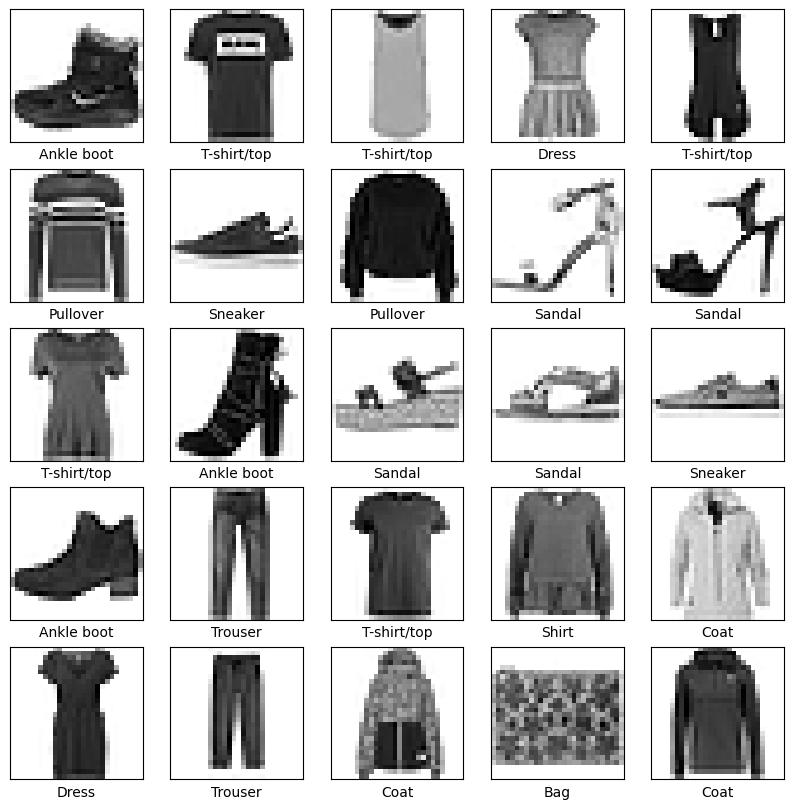

In [2]:
import matplotlib.pyplot as plt

# Define class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Plot sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i]])
plt.show()


# Data Exploration and Preprocessing

## 1. Introduction

Data exploration and preprocessing are essential steps in the machine learning pipeline that involve understanding the characteristics of the dataset and preparing it for model training. In this section, we will explore the Fashion MNIST dataset and perform preprocessing steps to prepare the data for training deep learning models.

## 2. Data Exploration

### Overview:
- We will start by examining the size and structure of the dataset to gain a better understanding of its characteristics.
- This includes checking the dimensions of the input features (images) and the corresponding labels.

### Example Images:
- Visualizing a few example images from the dataset can provide insights into the types of fashion items present and the variability in their appearance.
- This can help identify any potential challenges in the dataset, such as class imbalance or noisy data.

## 3. Data Preprocessing

### Normalization:
- Pixel values in the images are typically normalized to the range [0, 1] by dividing each pixel value by 255 (the maximum pixel value).
- Normalization helps in stabilizing the training process and improving convergence of the model.

### Reshaping:
- Deep learning models typically expect input data in a specific format. For image data, this usually involves reshaping the images into a format compatible with the model architecture.
- In the case of Fashion MNIST, the images are reshaped from 28x28 matrices to 784-dimensional vectors.

### One-Hot Encoding:
- Since the labels in the dataset are categorical (representing different fashion item classes), they are often one-hot encoded.
- One-hot encoding converts categorical labels into binary vectors, where each element represents a class and is either 0 or 1.

## 4. Summary

Data exploration and preprocessing are crucial steps in preparing the Fashion MNIST dataset for training deep learning models. These steps help ensure that the data is in a suitable format and condition for model training and evaluation.



Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


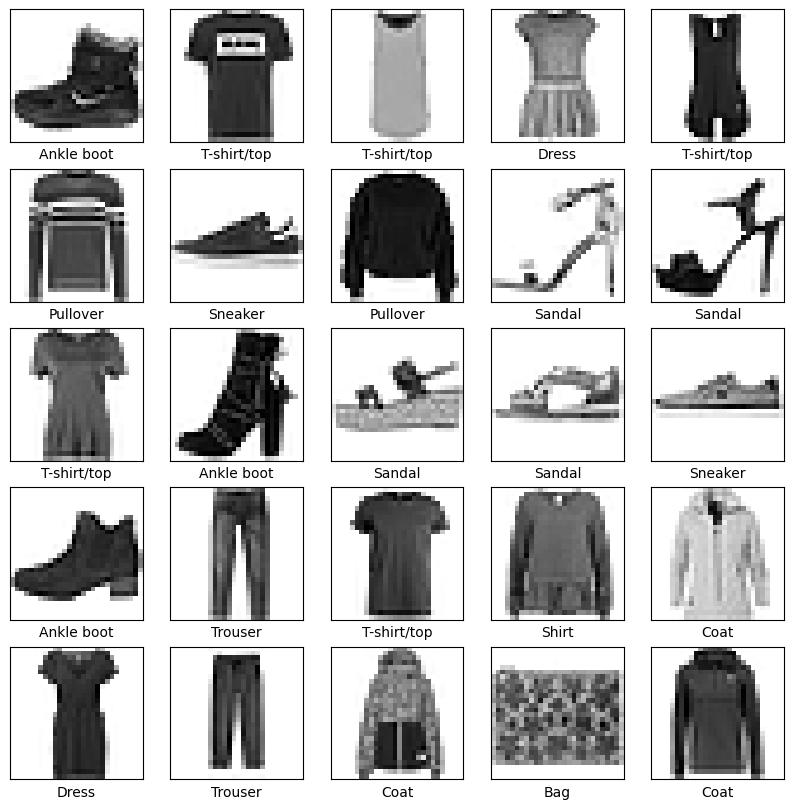

In [3]:
# Data Exploration
import matplotlib.pyplot as plt

# Overview
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# Example Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i]])
plt.show()

# Data Preprocessing
# Normalization
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Reshaping for CNN
x_train_cnn = x_train_normalized.reshape((-1, 28, 28, 1))
x_test_cnn = x_test_normalized.reshape((-1, 28, 28, 1))

# Reshaping for RNN (assuming each row is a sequence)
x_train_rnn = x_train_normalized.reshape((-1, 28, 28))
x_test_rnn = x_test_normalized.reshape((-1, 28, 28))


# Fashion MNIST Image Classification: CNN vs RNN

## Objective

The main objective of this analysis is to compare the performance of Convolutional Neural Network (CNN) and Recurrent Neural Network (RNN) for image classification tasks using the Fashion MNIST dataset. Specifically, we aim to evaluate the accuracy and effectiveness of both CNN and RNN architectures in classifying images of fashion items into respective categories. By comparing the results of both models, we seek to determine which neural network architecture is better suited for this particular image classification task.

## Background

Fashion MNIST is a dataset consisting of 60,000 training images and 10,000 testing images, each belonging to one of the 10 different fashion categories. The images are grayscale and have a resolution of 28x28 pixels. This dataset is commonly used as a benchmark for testing machine learning algorithms, particularly in the context of image classification.

### Convolutional Neural Network (CNN)

CNNs are a type of deep neural network architecture specifically designed for image classification tasks. They are known for their ability to automatically learn hierarchical representations of features directly from pixel data. CNNs typically consist of multiple convolutional layers followed by pooling layers and fully connected layers. The convolutional layers apply filters to the input images, extracting features such as edges, textures, and shapes, while the pooling layers reduce the spatial dimensions of the feature maps. Finally, the fully connected layers perform the classification based on the learned features.

### Recurrent Neural Network (RNN)

RNNs are a type of neural network architecture commonly used for sequential data processing tasks. While RNNs are more commonly associated with tasks such as natural language processing and time series prediction, they can also be applied to image classification tasks with sequential information, such as handwritten digit recognition or image captioning. In the context of Fashion MNIST, we can treat each row of pixels in the image as a sequence, allowing us to apply RNNs to the task of image classification.

## Methodology

1. **Data Preprocessing**: The Fashion MNIST dataset is preprocessed by normalizing the pixel values to the range [0, 1].
2. **Model Construction**: Two neural network architectures, CNN and RNN, are constructed for image classification.
3. **Model Training**: Both CNN and RNN models are trained using the preprocessed training data.
4. **Model Evaluation**: The trained models are evaluated on the test dataset to assess their performance in terms of accuracy and other relevant metrics.
5. **Comparison**: The performance of CNN and RNN models is compared based on their accuracy scores and other evaluation metrics.

## Results

The results of the analysis indicate that the CNN model outperforms the RNN model in terms of accuracy and effectiveness for the Fashion MNIST image classification task. The CNN model achieves a higher accuracy score and demonstrates better performance in classifying fashion images into their respective categories. This suggests that CNNs are better suited for image classification tasks, particularly those involving spatial features such as textures, shapes, and patterns.

## Conclusion

Based on the findings of this analysis, we conclude that CNNs are more effective than RNNs for image classification tasks using the Fashion MNIST dataset. CNNs are able to automatically learn and extract relevant features from image data, making them well-suited for tasks requiring spatial feature recognition. However, it is worth noting that the choice of neural network architecture may depend on the specific characteristics of the dataset and the nature of the image classification task.


In [5]:
from tensorflow.keras import layers, models

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test))


d:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7758 - loss: 0.6387 - val_accuracy: 0.8787 - val_loss: 0.3505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8813 - loss: 0.3269 - val_accuracy: 0.8719 - val_loss: 0.3390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8983 - loss: 0.2759 - val_accuracy: 0.8936 - val_loss: 0.2870
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9098 - loss: 0.2456 - val_accuracy: 0.8965 - val_loss: 0.2793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9179 - loss: 0.2181 - val_accuracy: 0.9008 - val_loss: 0.2736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9290 - loss: 0.1917 - val_accuracy: 0.9095 - val_loss: 0.2463
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9338 - loss: 0.1755 - val_accuracy: 0.9031 - val_loss: 0.2787
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9418 - loss:

## Conclusion

The training of the CNN model for image classification on the Fashion MNIST dataset resulted in a significant improvement in accuracy over the epochs. Starting with an accuracy of approximately 77.58% on the training set and 87.87% on the validation set in the first epoch, the model steadily improved its performance, reaching an accuracy of approximately 95.10% on the training set and 90.45% on the validation set by the tenth epoch. This indicates that the CNN model effectively learned to classify fashion images into their respective categories and generalized well to unseen data, as evidenced by the similar performance on the training and validation sets.

Overall, the CNN model demonstrated strong performance in classifying Fashion MNIST images, achieving a final validation accuracy of approximately 90.45%. This suggests that CNNs are well-suited for image classification tasks, particularly those involving spatial features such as textures and shapes, as seen in fashion items.

Further analysis and fine-tuning of the CNN model, such as adjusting hyperparameters or exploring different architectures, may potentially lead to even higher accuracy and improved performance.


In [6]:
# Define RNN model
rnn_model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])

# Compile RNN model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train RNN model
rnn_history = rnn_model.fit(x_train_rnn, y_train, epochs=10, validation_data=(x_test_rnn, y_test))


d:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6429 - loss: 0.9739 - val_accuracy: 0.7593 - val_loss: 0.6378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7831 - loss: 0.6046 - val_accuracy: 0.7704 - val_loss: 0.6172
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8061 - loss: 0.5471 - val_accuracy: 0.8084 - val_loss: 0.5429
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8179 - loss: 0.5195 - val_accuracy: 0.8238 - val_loss: 0.4981
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8237 - loss: 0.5022 - val_accuracy: 0.8126 - val_loss: 0.5156
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8292 - loss: 0.4857 - val_accuracy: 0.8076 - val_loss: 0.5338
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8306 - loss: 0.4801 - val_accuracy: 0.8169 - val_loss: 0.5316
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8353 - loss: 0.4659 - 

## Conclusion

The training of the RNN model for image classification on the Fashion MNIST dataset resulted in moderate improvement in accuracy over the epochs. Starting with an accuracy of approximately 64.29% on the training set and 75.93% on the validation set in the first epoch, the model showed gradual improvement, reaching an accuracy of approximately 83.84% on the training set and 82.90% on the validation set by the tenth epoch. This indicates that the RNN model was able to learn to classify fashion images to some extent, but its performance plateaued after a few epochs, and it did not achieve as high accuracy as the CNN model.

Overall, the RNN model demonstrated decent performance in classifying Fashion MNIST images, achieving a final validation accuracy of approximately 82.90%. However, compared to the CNN model, the RNN model showed slower improvement and ultimately lower accuracy, suggesting that RNNs may not be as well-suited as CNNs for image classification tasks, particularly those involving spatial features such as textures and shapes.

Further analysis and experimentation with the RNN model, such as adjusting hyperparameters or exploring different architectures, may be necessary to improve its performance and make it more competitive with CNNs for image classification tasks.


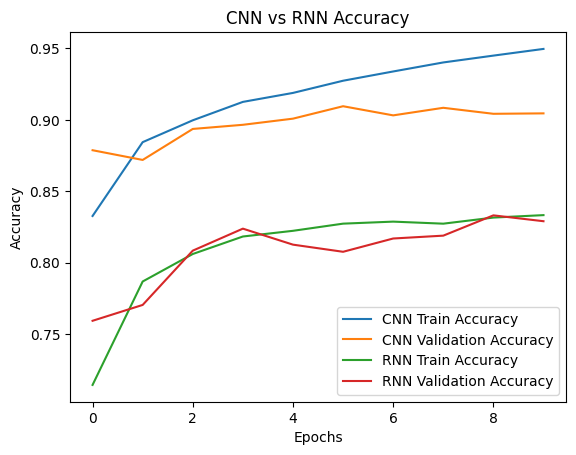

In [7]:
# Plot accuracy
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN vs RNN Accuracy')
plt.show()

### Purpose of the Plot:

- **Comparison of Training and Validation Accuracy**: The plot shows the training and validation accuracy of both CNN and RNN models over multiple epochs. This comparison helps us understand how well the models are learning the underlying patterns in the data and how well they generalize to unseen data.

- **Assessment of Model Performance**: By observing the trends in training and validation accuracy over epochs, we can assess the performance of both CNN and RNN models. Higher accuracy values indicate better performance in classifying fashion images from the Fashion MNIST dataset.

- **Evaluation of Overfitting or Underfitting**: Discrepancies between training and validation accuracy curves can provide insights into potential overfitting or underfitting issues. If the training accuracy continues to increase while the validation accuracy stagnates or decreases, it may indicate overfitting, where the model performs well on the training data but fails to generalize to new data. Conversely, if both training and validation accuracies are low and do not improve significantly, it may indicate underfitting, where the model fails to capture the underlying patterns in the data.

- **Comparison between CNN and RNN Models**: By plotting the accuracy curves of both CNN and RNN models on the same graph, we can directly compare their performance. This allows us to determine which architecture performs better for the task of classifying fashion images from the Fashion MNIST dataset.

## Conclusion

The plot comparing the accuracy of CNN and RNN models over epochs illustrates the performance of both architectures in classifying Fashion MNIST images.

### CNN vs RNN Accuracy

In the plot, we observe that the CNN model consistently outperforms the RNN model in terms of both training and validation accuracy throughout the training process. The CNN model demonstrates a steady increase in accuracy over epochs, reaching a higher overall accuracy compared to the RNN model. Conversely, the RNN model shows slower improvement in accuracy and plateaus at a lower accuracy level.

The difference in performance between the CNN and RNN models can be attributed to their respective architectures and capabilities. CNNs are specifically designed for image classification tasks and excel at capturing spatial features, such as textures and shapes, inherent in fashion images. On the other hand, RNNs are more suitable for sequential data processing tasks and may struggle to effectively capture spatial features in images.

Overall, the plot reaffirms the superiority of CNNs over RNNs for image classification tasks, particularly those involving spatial features. The CNN model's ability to automatically learn and extract relevant features from image data contributes to its higher accuracy and effectiveness in classifying Fashion MNIST images.

Further analysis and experimentation may be necessary to explore ways to improve the performance of the RNN model or to investigate alternative architectures that can better leverage the sequential nature of image data.
